In [3]:
# Import
try: 
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
except:
    print(f'[INFO] Installing the required libraries')
    !pip install numpy pandas matplotlib seaborn
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

[INFO] Installing the required libraries
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 2.3 MB/s eta 0:00:00a 0:00:01


In [92]:
# Load Dataset
data = pd.read_csv("final_data.csv", sep=',')
display(data)
# data.head(5)
print("# Present: ", data.shape[0])
print(data.info())

,Day,Start,Category,Company,Ordered,Event After,Duration
0,1,131,0,1,0,1,21
1,2,148,0,1,0,0,37
2,3,84,0,0,0,1,18
3,5,139,0,0,0,1,19
4,0,40,1,0,0,0,23
...,...,...,...,...,...,...,...
70,6,67,2,1,1,0,42
71,1,63,2,1,0,0,18
72,2,45,2,1,1,0,45
73,4,62,2,1,0,0,35


# Present:  75
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Day          75 non-null     int64
 1   Start        75 non-null     int64
 2   Category     75 non-null     int64
 3   Company      75 non-null     int64
 4   Ordered      75 non-null     int64
 5   Event After  75 non-null     int64
 6   Duration     75 non-null     int64
dtypes: int64(7)
memory usage: 4.2 KB
None


In [93]:
print(f'Number of columns: {len(data.columns)}')
print(f'Number of rows: {len(data)}')
print(f'Number of rows with category = 0: {len(data[data["Category"] == 0])}')
print(f'Number of rows with category = 1: {len(data[data["Category"] == 1])}')
print(f'Number of rows with category = 2: {len(data[data["Category"] == 2])}')


Number of columns: 7
Number of rows: 75
Number of rows with category = 0: 24
Number of rows with category = 1: 26
Number of rows with category = 2: 25


In [94]:
# Outlier Data
target = "Duration"

# Targets
Y = np.array(data[target])
avg = np.average(Y)
var = np.var(Y)
print("Average: ", avg)
print("Variance: ", var)

# # Percentile
# print("# Present: ", data.shape[0])
# p = 10
# tail, head = np.percentile(data[target], q=p), np.percentile(data[target], q=100-p)

# # Outliers
# out_data = data[((data[target] < tail) | (data[target] > head))]

# # Remove Outliners
# data = data[~((data[target] < tail) | (data[target] > head))]

# # Number of Outliers
# print("# Outliers: ", out_data.shape[0])
# print("# Present: ", data.shape[0])
# Y = np.array(data[target])
# avg = np.average(Y)
# var = np.var(Y)
# print("Average: ", avg)
# print("Variance: ", var)

Average:  28.88
Variance:  76.29226666666665


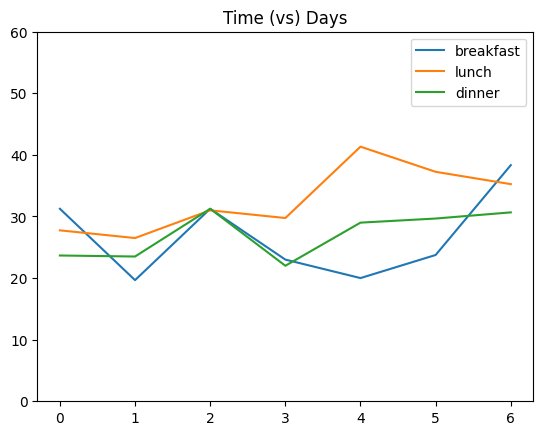

In [95]:
# Main Plot
breakfast_data = data[(data["Category"] == 0)]
lunch_data = data[(data["Category"] == 1)]
dinner_data = data[(data["Category"] == 2)]

# Prep something
def prep_arr(des):
    count = np.zeros(7)
    duration = np.zeros(7)
    x = []
    y = []

    for i in des:
        count[i[0]] += 1
        duration[i[0]] += i[1]

    for i in range(len(count)):
        if count[i] != 0:
            x.append(i)
            y.append(duration[i]/count[i])

    return x, y

ax, ay = prep_arr(breakfast_data[["Day", "Duration"]].to_numpy())
bx, by = prep_arr(lunch_data[["Day", "Duration"]].to_numpy())
cx, cy = prep_arr(dinner_data[["Day", "Duration"]].to_numpy())

# Matplotlib Stuff
plt.title('Time (vs) Days')

plt.plot(ax, ay, label='breakfast')
plt.plot(bx, by, label='lunch')
plt.plot(cx, cy, label='dinner')
plt.ylim([0, 60])
plt.legend()
plt.show()


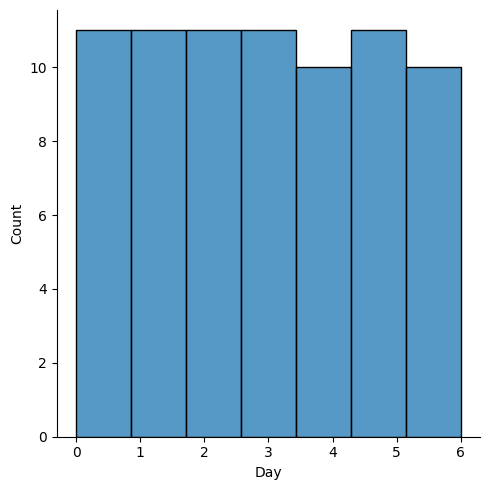

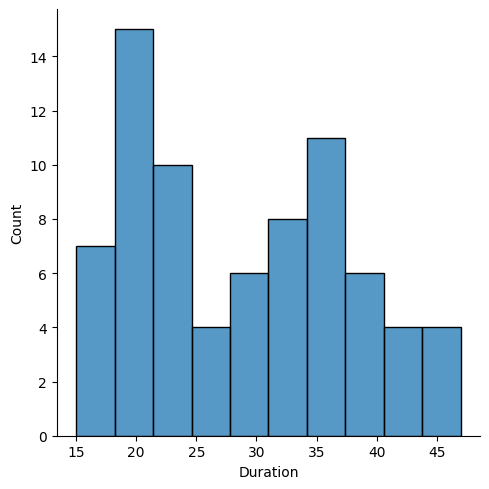

In [96]:
# Individual Densities (Overall)
sns.displot(data['Day'], bins=7)
# sns.displot(data['Start'])
# sns.displot(breakfast_data[['Start']])
# #sns.displot(data['Category'])
# #sns.displot(data['Company'])
# #sns.displot(data['Ordered'])
# #sns.displot(data['Event After'])
sns.displot(data['Duration'], bins=10)


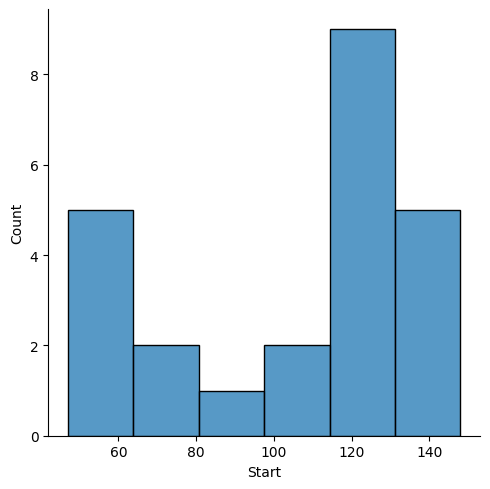

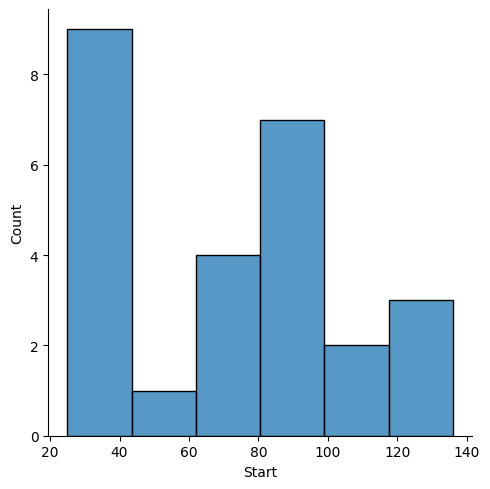

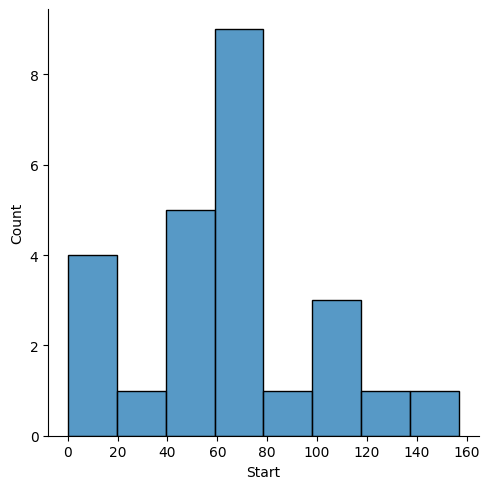

In [97]:
# Individual Densities of Start (By Category)
sns.displot(breakfast_data['Start'])
sns.displot(lunch_data['Start'])
sns.displot(dinner_data['Start'])

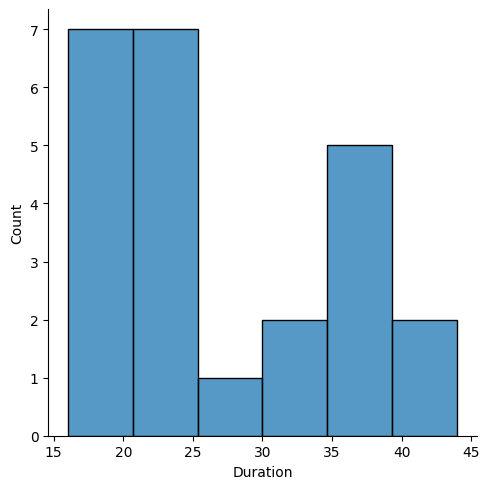

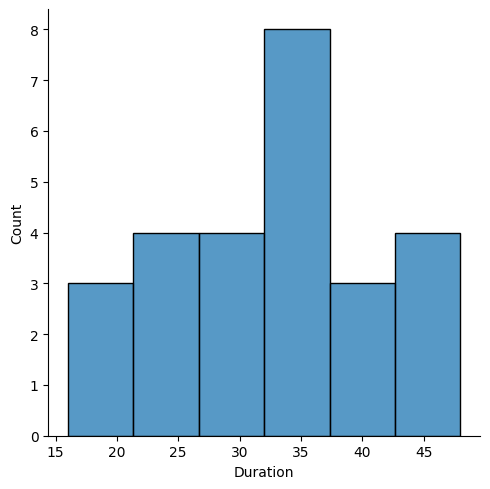

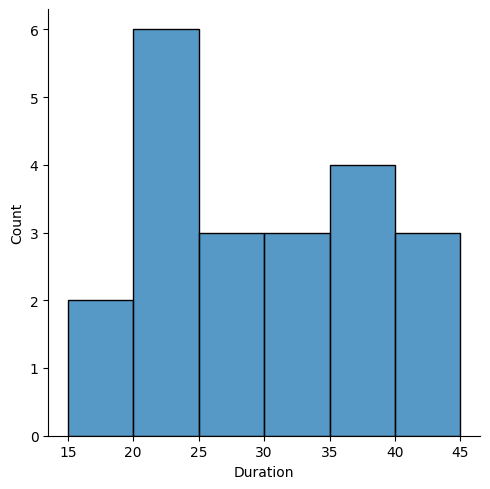

In [89]:
# Individual Densities of Duration (By Category)
sns.displot(breakfast_data['Duration'])
sns.displot(lunch_data['Duration'])
sns.displot(dinner_data['Duration'])

In [90]:
data[["Day", "Start", "Duration"]].describe()

,Day,Start,Duration
count,75.000000,75.000000,75.000000
mean,2.946667,79.706667,29.880000
std,2.006027,38.352833,8.963831
min,0.000000,0.000000,15.000000
25%,1.000000,53.500000,22.000000
50%,3.000000,75.000000,30.000000
75%,5.000000,113.500000,37.000000
max,6.000000,157.000000,48.000000


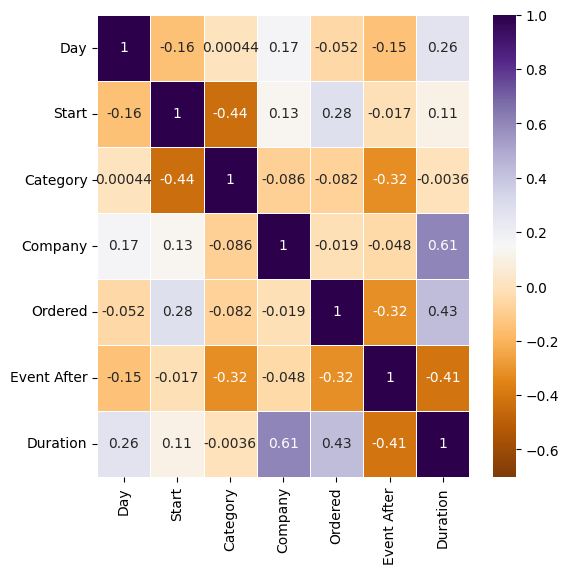

In [98]:
# Sample correlations using Seaborn heatmap
correlation = data.corr()
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0.5, linecolor="white",vmin=-0.7, cmap="PuOr")